In [1]:
#knn
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:

dataset = pd.read_csv("class B.csv") 
print (dataset.head) 

<bound method NDFrame.head of       satisfaction_level  left  last_evaluation  number_project  \
0                   0.11     1             0.85               6   
1                   0.11     1             0.85               6   
2                   0.11     1             0.85               6   
3                   0.37     0             0.82               3   
4                   0.46     1             0.48               2   
...                  ...   ...              ...             ...   
4495                0.63     0             0.85               3   
4496                0.59     0             0.91               4   
4497                0.68     0             0.72               4   
4498                0.66     0             0.75               4   
4499                0.63     0             0.94               3   

      average_montly_hours  time_spend_company  Work_accident  \
0                      308                   5              0   
1                      308         

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     4500 non-null   float64
 1   left                   4500 non-null   int64  
 2   last_evaluation        4500 non-null   float64
 3   number_project         4500 non-null   int64  
 4   average_montly_hours   4500 non-null   int64  
 5   time_spend_company     4500 non-null   int64  
 6   Work_accident          4500 non-null   int64  
 7   promotion_last_5years  4500 non-null   int64  
 8   Department             4500 non-null   object 
 9   salary                 4500 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 351.7+ KB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.0
mean,0.482471,0.167556,0.719629,4.037556,207.479333,3.401333,0.152889,0.0
std,0.172912,0.373513,0.165725,1.343996,51.936454,1.398821,0.359920,0.0
min,0.090000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0
25%,0.460000,0.000000,0.580000,3.000000,165.000000,2.000000,0.000000,0.0
50%,0.530000,0.000000,0.720000,4.000000,207.000000,3.000000,0.000000,0.0
75%,0.600000,0.000000,0.870000,5.000000,253.000000,4.000000,0.000000,0.0
max,0.720000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,0.0


<AxesSubplot:>

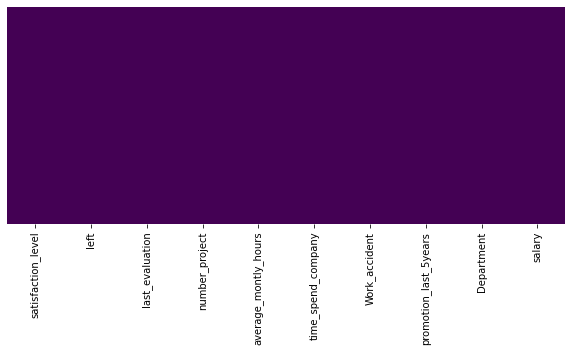

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='left', ylabel='count'>

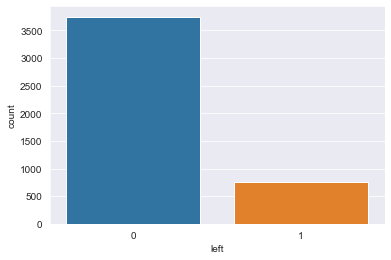

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True) 


In [8]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [9]:

dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                              prefix ='salary') 
# Adding these dummy variable to input X 
X = pd.concat([x,dum_Department, dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(4500, 20)
(4500,)


In [10]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.86888889 0.90666667 0.94       0.96222222 0.96666667 0.96444444
 0.95555556 0.95333333 0.95333333 0.86222222]


In [11]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9333333333333332
